In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import datetime
import re
import sqlite3 as lite
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn 

# Data Collection and Transformation

In [2]:
url = 'http://web.mta.info/developers/turnstile.html'
chromedriver = "/Users/Miya/Downloads/chromedriver.exe"
os.environ["webdriver.chrome.driver"] = chromedriver
driver = webdriver.Chrome(chromedriver)
driver.get(url)
html_source = driver.page_source
soup = BeautifulSoup(html_source, 'html.parser')
# extract file link
pattern = re.compile('^data.')
data_list =  []
for link in soup.find_all('a', href=True):
    if re.match(pattern,link['href']):
        data_list.append('http://web.mta.info/developers/'+link['href'])
#check: data should range from 05/05/2010 to 04/29/2017
print(data_list[0])
print(data_list[-1][-10:-4])

http://web.mta.info/developers/data/nyct/turnstile/turnstile_170429.txt
100505


Two data schemas for before and after 10/18/14. 

In [3]:
for i, v in enumerate(data_list):
    if v[-10:] == '141011.txt':
        print(i)

133


In [ ]:
data_list_prior = data_list[133:]
data_list_post = data_list[:134]

#### Create two tables to store the data 

In [ ]:
conPost = lite.connect('post.db')  
conPre = lite.connect('pre.db')

**A.** Collect data ** AFTER** 10/18/14 

In [ ]:
record_cnt = 0  
for link in data_list_post:
    data = pd.read_table(link, sep=',')
    print('%s:%s rows %s columns' % (link[-10:-4],data.shape[0], data.shape[1])) #printing out values makes me feel safe....
    record_cnt += data.shape[0]
    data.to_sql(name='post', con=conPost, flavor='sqlite', if_exists='append')

Check we don't miss anything

In [23]:
with conPost:
    cur = conPost.cursor()
    cur.execute("""select count(*) from post""")
    cnt = cur.fetchall()
    print(cnt)
    print(record_cnt)

[(25304899,)]
25304899


**B.** Collec data ** BEFORE** 10/18/14 

record_cnt = 0 
col_names = ["C/A","UNIT","SCP","DATE","TIME","DESC","ENTRIES","EXITS"]

for link in data_list_prior:
    for i in range(3,39,5):
        data = pd.read_table(link, sep=',',header = None,usecols = [0,1,2,i,i+1,i+2,i+3,i+4],names = col_names)
        print('%s:%s rows %s columns' % (link[-10:-4],data.shape[0], data.shape[1]))
        record_cnt += data.shape[0]
        data.to_sql(name='prePart', con=conPre, flavor='sqlite', if_exists='append')

with conPre:
    cur = conPre.cursor()
    cur.execute("""select count(*) from prePart""")
    cnt = cur.fetchall()

In [5]:
record_cnt = 0 
col_names = ["C/A","UNIT","SCP","DATE1","TIME1","DESC1","ENTRIES1","EXITS1",
             "DATE2","TIME2","DESC2","ENTRIES2","EXITS2",
             "DATE3","TIME3","DESC3","ENTRIES3","EXITS3",
             "DATE4","TIME4","DESC4","ENTRIES4","EXITS4",
             "DATE5","TIME5","DESC5","ENTRIES5","EXITS5",
             "DATE6","TIME6","DESC6","ENTRIES6","EXITS6",
             "DATE7","TIME7","DESC7","ENTRIES7","EXITS7",
             "DATE8","TIME8","DESC8","ENTRIES8","EXITS8"]

for link in data_list_prior:
    df = pd.read_table(link, sep=',',header = None,names = col_names)
    print('%s:%s rows %s columns' % (link[-10:-4],df.shape[0], df.shape[1]))
    record_cnt += df.shape[0]
    df.to_sql(name='prePart', con=conPre, flavor='sqlite', if_exists='append')

141011:29797 rows 43 columns
141004:30125 rows 43 columns
140927:29972 rows 43 columns
140920:29628 rows 43 columns
140913:29676 rows 43 columns
140906:30081 rows 43 columns
140830:29421 rows 43 columns
140823:29791 rows 43 columns
140816:29448 rows 43 columns
140809:29639 rows 43 columns
140802:29396 rows 43 columns
140726:29450 rows 43 columns
140719:29432 rows 43 columns
140712:29068 rows 43 columns
140705:28769 rows 43 columns
140628:29375 rows 43 columns
140621:29284 rows 43 columns
140614:29418 rows 43 columns
140607:29728 rows 43 columns
140531:29294 rows 43 columns
140524:29211 rows 43 columns
140517:29205 rows 43 columns
140510:29419 rows 43 columns
140503:29298 rows 43 columns
140426:29492 rows 43 columns
140419:29821 rows 43 columns
140412:29752 rows 43 columns
140405:29891 rows 43 columns
140329:29515 rows 43 columns
140322:29299 rows 43 columns
140315:28789 rows 43 columns
140308:29204 rows 43 columns
140301:29317 rows 43 columns
140222:28973 rows 43 columns
140215:29390 r

C:\Users\Miya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6,7,11,12,16,17,21,22,26,27,31,36,37,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


120714:28879 rows 43 columns
120707:28486 rows 43 columns
120630:28588 rows 43 columns
120623:28292 rows 43 columns
120616:28454 rows 43 columns
120609:28325 rows 43 columns
120602:28353 rows 43 columns
120526:29036 rows 43 columns
120519:28444 rows 43 columns
120512:28633 rows 43 columns


C:\Users\Miya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


120505:30042 rows 43 columns
120428:34120 rows 43 columns
120421:28758 rows 43 columns
120414:31160 rows 43 columns
120407:33171 rows 43 columns
120331:31028 rows 43 columns
120324:28317 rows 43 columns
120317:27865 rows 43 columns
120310:28310 rows 43 columns
120303:28289 rows 43 columns
120225:28129 rows 43 columns
120218:28089 rows 43 columns
120211:28295 rows 43 columns
120204:28516 rows 43 columns
120128:28055 rows 43 columns
120121:27851 rows 43 columns
120114:27980 rows 43 columns
120107:27733 rows 43 columns
111231:27577 rows 43 columns
111224:27863 rows 43 columns
111219:30800 rows 43 columns
111210:29210 rows 43 columns
111203:27944 rows 43 columns
111126:27849 rows 43 columns
111119:29965 rows 43 columns
111112:27956 rows 43 columns
111105:29641 rows 43 columns
111029:29103 rows 43 columns
111022:29308 rows 43 columns
111015:29124 rows 43 columns
111008:29390 rows 43 columns
111001:29647 rows 43 columns
110924:29652 rows 43 columns
110917:29465 rows 43 columns
110910:29282 r

OperationalError: no such table: prior

In [7]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select count(*) from prePart""")
    cnt = cur.fetchall()  

In [8]:
print(cnt)
print(record_cnt)

[(6747078,)]
6747078


with conPre:
    cur = conPre.cursor()
    cur.execute("""Create table prior AS select [C/A],UNIT,SCP,DATE1 AS DATE,TIME1 AS TIME,DESC1 AS DESC,ENTRIES1 AS ENTRIES,EXITS1 AS EXITS from prePart 
    UNION ALL 
    select [C/A],UNIT,SCP,DATE2 AS DATE,TIME2 AS TIME,DESC2 AS DESC,ENTRIES2 AS ENTRIES,EXITS2 AS EXITS from prePart 
    UNION ALL 
    select [C/A],UNIT,SCP,DATE3 AS DATE,TIME3 AS TIME,DESC3 AS DESC,ENTRIES3 AS ENTRIES,EXITS3 AS EXITS from prePart 
    UNION ALL 
    select [C/A],UNIT,SCP,DATE4 AS DATE,TIME4 AS TIME,DESC4 AS DESC,ENTRIES4 AS ENTRIES,EXITS4 AS EXITS from prePart 
    UNION ALL 
    select [C/A],UNIT,SCP,DATE5 AS DATE,TIME5 AS TIME,DESC5 AS DESC,ENTRIES5 AS ENTRIES,EXITS5 AS EXITS from prePart 
    UNION ALL 
    select [C/A],UNIT,SCP,DATE6 AS DATE,TIME6 AS TIME,DESC6 AS DESC,ENTRIES6 AS ENTRIES,EXITS6 AS EXITS from prePart 
    UNION ALL 
    select [C/A],UNIT,SCP,DATE7 AS DATE,TIME7 AS TIME,DESC7 AS DESC,ENTRIES7 AS ENTRIES,EXITS7 AS EXITS from prePart 
    UNION ALL 
    select [C/A],UNIT,SCP,DATE8 AS DATE,TIME8 AS TIME,DESC8 AS DESC,ENTRIES8 AS ENTRIES,EXITS8 AS EXITS from prePart""")

with conPre:
    cur = conPre.cursor()
    cur.execute("""select count(*) from prior""")
    cnt = cur.fetchall()
print(cnt)

#### Add TURNSTILE and modify data type

In [ ]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""UPDATE prior set ENTRIES = CAST(ENTRIES as real)""")
    cur.execute("""UPDATE prior set EXITS = CAST(EXITS as real)""")

In [ ]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""create TABLE pre AS select *, [C/A] || '-' || UNIT || '-' || SCP AS TURNSTILE from prior""")

**C.** Collect data about Remote Unit/Control Area/Station Name Key

In [15]:
col_names = ["UNIT",'C/A','STATION','LINENAME','DIVISION']
remote = pd.read_excel("http://web.mta.info/developers/resources/nyct/turnstile/Remote-Booth-Station.xls", names=col_names).drop_duplicates(['UNIT','C/A'])
remote.to_sql(name='remote', con=conPre, flavor='sqlite', if_exists='replace')

with conPre:
    cur = conPre.cursor()
    cur.execute("""select count(*) from remote""")
    cnt = cur.fetchall()
    print(cnt)

[(768,)]


Now we have two databases: post.db and pre.db

1. **post.db** has **one** table called **post**, which stores complete information about data after 10/18/14;

2. **pre.db** has **two** tables called **remote and prior**;

** schemas of tables:**

In [16]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select sql from sqlite_master where type = 'table' and name = 'prior'""")
    desc = cur.fetchall()
    print(desc)

[('CREATE TABLE prior(\n  "C/A" TEXT,\n  UNIT TEXT,\n  SCP TEXT,\n  DATE TEXT,\n  TIME TEXT,\n  "DESC" TEXT,\n  ENTRIES INT,\n  EXITS INT\n)',)]


In [23]:
with conPost:
    cur = conPost.cursor()
    cur.execute("""select sql from sqlite_master where type = 'table' and name = 'post'""")
    desc = cur.fetchall()
    print(desc)

[('CREATE TABLE "post" (\n"index" INTEGER,\n  "C/A" TEXT,\n  "UNIT" TEXT,\n  "SCP" TEXT,\n  "STATION" TEXT,\n  "LINENAME" TEXT,\n  "DIVISION" TEXT,\n  "DATE" TEXT,\n  "TIME" TEXT,\n  "DESC" TEXT,\n  "ENTRIES" INTEGER,\n  "EXITS                                                               " INTEGER\n)',)]


** Sanity Check:** Missing Data

Turntiles are missing somewhere

In [ ]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select count([C/A]), COUNT(SCP),count(unit) from prior""")
    cnt = cur.fetchall()
    print(cnt)

# Data Analysis

#### 1. Which station has the most number of units?
    
   **Answer：** 86 ST  

In [406]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select STATION, COUNT(DISTINCT unit) from remote group by STATION order by count(distinct unit) desc limit 1""")
    top_station = cur.fetchall()
print(top_station)
end = datetime.datetime.now()
print('Spend %s seconds'%(end-start).seconds)

[('86 ST', 5)]
Spend 0 seconds


#### 2. What is the total number of entries & exits across the subway system for August 1, 2013?

   **Answer：** 
   
   Due to the complexity of data recording, there are different ways to define daily total number of entries & exits. 
   
   Here I tried two methods:
   
   One is for each turnstile, daily registration is calculated by max(today) - max(previous); 
   
   Another is for each turnstile, daily registration is calculated by Last record(today) - first record(today). 
   
   Those two methods gave me two results: **9958949** for the first and **9636595** for the second.
   
   Comparing the two, I chose the first method for its simplicity.

###### Solution A:

In [3]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select Turnstile,date,max(ENTRIES) AS entries, max(exits) as exits from pre
    group by Turnstile, date Having DATE IN ('08-01-13','07-31-13') AND DESC = 'REGULAR'""")
    EE080113 = cur.fetchall()
end = datetime.datetime.now()
print('Spend %s seconds'%(end-start).seconds)

Spend 123 seconds


In [19]:
EE080113_df = pd.DataFrame(EE080113,columns = ['turnstile','date','entries','exits'])
sum(list(filter(lambda x:x>0,EE080113_df.groupby(['turnstile','date']).sum().sum(axis = 1).groupby(level = 0).diff().dropna().values)))

9958949.0

##### Solution B:

In [ ]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select TURNSTILE,DESC,TIME,(ENTRIES+EXITS) AS TOTAL \
    from prior where DATE = '08-01-13' AND DESC IN ('REGULAR','RECOVR AUD')
    UNION ALL
    select TURNSTILE,DESC,'24:00:00' AS TIME,(ENTRIES+EXITS) AS TOTAL \
    from prior where DATE = '08-02-13' AND TIME = '00:00:00'AND DESC IN ('REGULAR','RECOVR AUD')""")
    EE080113 = cur.fetchall()

In [475]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select TURNSTILE,DESC,TIME,(ENTRIES+EXITS) AS TOTAL \
    from pre where DATE = '08-01-13' AND DESC IN ('REGULAR','RECOVR AUD')
    UNION ALL
    select TURNSTILE,DESC,'24:00:00' AS TIME,(ENTRIES+EXITS) AS TOTAL \
    from pre where DATE = '08-02-13' AND TIME = '00:00:00'AND DESC IN ('REGULAR','RECOVR AUD')""")
    EE080113 = cur.fetchall()
end = datetime.datetime.now()
EE080113_df = pd.DataFrame(EE080113,columns = ['turnstile','DESC','time','total'])
print(len(EE080113_df))
EE080113_df = EE080113_df.dropna().sort_values(by = 'DESC').reindex()
print(len(EE080113_df))
## recover audit
EE080113_df = EE080113_df[~EE080113_df.duplicated(['turnstile','time'],keep = 'first').values].groupby(['turnstile','time']).sum().sort_index()
print(len(EE080113_df))
first = EE080113_df.groupby(level=0).nth(0)
last = EE080113_df.groupby(level=0).nth(-1)
diff = pd.concat([first, last], axis=1, join='inner').diff(axis = 1)
print(diff.sum())
print('Spend %s seconds'%(end-start).seconds)

31947
31947
30666
total          0.0
total   -1236270.0
dtype: float64
Spend 74 seconds


Why the value is negative? 

In [482]:
diff[diff.iloc[:,-1]<0]

,total,total
turnstile,,
N504-R021-02-00-04,NaN,-10869325.0


It shows Turnstile N504-R021-02-00-04 has strange records. Then let's see full records of Turnstile N504-R021-02-00-04 

In [416]:
EE080113_df.iloc[EE080113_df.index.get_level_values('turnstile') == 'N504R02102-00-04']

total
turnstile        time                
N504R02102-00-04 00:00:00  10874252.0
                 04:00:00  10874298.0
                 08:00:00  10874687.0
                 12:00:00      1822.0
                 16:00:00      2774.0
                 20:00:00      4517.0
                 24:00:00      4927.0

In [483]:
print('Total number of entries & exits for Turnstile N504-R021-02-00-04 should be %s' % ((10874687 - 10874252)+(4927-1822)))

Total number of entries & exits for Turnstile N504-R021-02-00-04 should be 3540


Plot the distribution to see if the results make sense

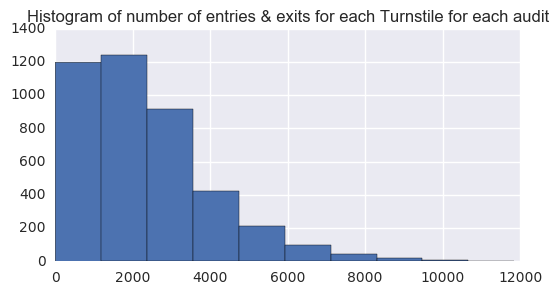

In [543]:
plt.figure(figsize=(6,3))
plt.hist(diff[diff.iloc[:,-1]>0].iloc[:,-1].values)
plt.title('Histogram of number of entries & exits for each Turnstile for each audit')

In [491]:
print('The final answer is %s' %(sum(diff[diff.iloc[:,-1]>0].iloc[:,-1].values)+3540))

The final answer is 9636595.0


#### 3. Let’s define the busy-ness as sum of entry & exit count. What station was the busiest on August 1, 2013? What turnstile was the busiest on that date?

   **Answer：** 
   1. '42 ST-GRD CNTRL'
   2. C/A: N063A;  UNIT: R011;   SCP: 00-00-00

In [32]:
turnstile_r_df = pd.DataFrame(EE080113_df.groupby(['turnstile','date']).sum().sum(axis = 1).groupby(level = 0).diff().dropna())#.values
turnstile_r_df.sort_values(by = 0,ascending = False).iloc[0,:]

0    11786.0
Name: (N063A-R011-00-00-00, 08-01-13), dtype: float64

In [45]:
turnstile_r_df = turnstile_r_df.reset_index()
turnstile_r_df['station'] = list(map(lambda x:x.split('-')[0]+'-'+x.split('-')[1],turnstile_r_df['turnstile']))
turnstile_r_df[['station',0]].groupby('station').sum().sort_values(by = 0,ascending = False).iloc[0,:]

0    131388.0
Name: R238-R046, dtype: float64

In [46]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select STATION from remote where UNIT = 'R046' AND [C/A] = 'R238'""")
    busy_station = cur.fetchall()
print(busy_station)

[('42 ST-GRD CNTRL',)]


#### 4. What stations have seen the most usage growth/decline in 2013

   **Answer:** 
   1. decease:[('66 ST-LINCOLN',)]
   2. incease:[('FULTON ST',)]

In [4]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select TURNSTILE,date,max(ENTRIES) AS entries, max(exits) as exits from pre
    group by turnstile, date Having DATE LIKE '%13' AND DESC = 'REGULAR'""")
    EE13 = cur.fetchall()
end = datetime.datetime.now()
print('Spend %s seconds'%(end-start).seconds)
EE13_df = pd.DataFrame(EE13,columns = ['turnstile','date','entries','exits'])
turnstile_r_df_13 = pd.DataFrame(EE13_df.groupby(['turnstile','date']).sum().sum(axis = 1).groupby(level = 0).diff().dropna())#.values

Spend 127 seconds


In [51]:
turnstile_r_df13 = turnstile_r_df_13.reset_index()
turnstile_r_df13['station'] = list(map(lambda x:x.split('-')[0]+'-'+x.split('-')[1],turnstile_r_df13['turnstile']))
turnstile_r_df13 = turnstile_r_df13[turnstile_r_df13[0]>0]
last13 = turnstile_r_df13[['station','date',0]].groupby(['station','date']).sum().sort_index().groupby(level=0).nth(-1)
first13 = turnstile_r_df13[['station','date',0]].groupby(['station','date']).sum().sort_index().groupby(level=0).nth(0)
last13.columns = ['Re13']

In [65]:
change_df = last12.join(last13,lsuffix = '%')
pd.DataFrame((change_df['Re13']-change_df['Re12'])/change_df['Re12']).sort_values(by  = 0).iloc[0,:]

0   -0.980173
Name: OB01-R459, dtype: float64

In [66]:
pd.DataFrame((change_df['Re13']-change_df['Re12'])/change_df['Re12']).sort_values(by  = 0).iloc[-1,:]

0   NaN
Name: R217-R194, dtype: float64

In [67]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select STATION from remote where UNIT = 'R459' AND [C/A] = 'OB01'""")
    d_station = cur.fetchall()
    print('decease:%s'%d_station)
    print("---------")
    cur.execute("""select STATION from remote where UNIT = 'R194' AND [C/A] = 'R217'""")
    i_station = cur.fetchall()
    print('incease:%s'%i_station)

decease:[('ORCHARD BEACH',)]
---------
incease:[]


In [55]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select TURNSTILE,DESC,DATE || TIME AS TIME,(ENTRIES+EXITS) AS TOTAL \
    from pre where DATE LIKE '%13' AND DESC IN ('REGULAR','RECOVR AUD')
    UNION ALL
    select TURNSTILE,DESC,'12-31-13'||'24:00:00' AS TIME,(ENTRIES+EXITS) AS TOTAL \
    from prior where DATE = '01-01-14' AND TIME = '00:00:00'AND DESC IN ('REGULAR','RECOVR AUD')""")
    EE13 = cur.fetchall()
end = datetime.datetime.now()
EE13_df = pd.DataFrame(EE13,columns = ['turnstile','DESC','time','total'])
print(len(EE13_df))
EE13_df = EE13_df.dropna().sort_values(by = 'DESC').reindex()
print(len(EE13_df))
## recover audit
EE13_df = EE13_df[~EE13_df.duplicated(['turnstile','time'],keep = 'first').values].groupby(['turnstile','time']).sum().sort_index()
print(len(EE13_df))
first = EE13_df.groupby(level=0).nth(0)
last = EE13_df.groupby(level=0).nth(-1)
diff = pd.concat([first, last], axis=1, join='inner').diff(axis = 1)
print(diff.sum())
print('Spend %s seconds'%(end-start).seconds)

10417845
10417838
10017549
total    0.000000e+00
total    1.659806e+10
dtype: float64
Spend 96 seconds


In [56]:
index_N = diff[diff.iloc[:,-1]<0].index
dict_ee = dict()
for i in index_N:
    dict_ee[i] = 0
    ee = EE13_df.iloc[EE13_df.index.get_level_values('turnstile') == i].values
    value0 = ee[0]
    for value in ee[1:]:
        if value>=value0:
            dict_ee[i]+=value-value0
            value0 = value
        else:
            value0 = value
for index in dict_ee.keys():
    diff.ix[index,-1] = dict_ee[index][0]
    
diff['station'] = list(map(lambda x: x.split('_')[0]+x.split('_')[1],diff.index))
ee2013 = diff.groupby(['station']).sum()
ee2013.columns = ['NA','2013']

In [60]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select [C/A] || '_' || UNIT || '_' || SCP AS TURNSTILE,DESC,DATE || TIME AS TIME,(ENTRIES+EXITS) AS TOTAL \
    from prior where DATE LIKE '%12' AND DESC IN ('REGULAR','RECOVR AUD')
    UNION ALL
    select [C/A] || '_' || UNIT || '_' || SCP AS TURNSTILE,DESC,'12-31-12'||'24:00:00' AS TIME,(ENTRIES+EXITS) AS TOTAL \
    from prior where DATE = '01-01-13' AND TIME = '00:00:00'AND DESC IN ('REGULAR','RECOVR AUD')""")
    EE12 = cur.fetchall()
EE12_df = pd.DataFrame(EE12,columns = ['turnstile','DESC','time','total'])
EE12_df = EE12_df.dropna().sort_values(by = 'DESC').reindex()
EE12_df = EE12_df[~EE12_df.duplicated(['turnstile','time'],keep = 'first').values].groupby(['turnstile','time']).sum().sort_index()
first = EE12_df.groupby(level=0).nth(0)
last = EE12_df.groupby(level=0).nth(-1)
diff12 = pd.concat([first, last], axis=1, join='inner').diff(axis = 1)
index_N = diff12[diff12.iloc[:,-1]<0].index
dict_ee = dict()
for i in index_N:
    dict_ee[i] = 0
    ee = EE12_df.iloc[EE12_df.index.get_level_values('turnstile') == i].values
    value0 = ee[0]
    for value in ee[1:]:
        if value>=value0:
            dict_ee[i]+=value-value0
            value0 = value
        else:
            value0 = value
for index in dict_ee.keys():
    diff12.ix[index,-1] = dict_ee[index][0]
diff12['station'] = list(map(lambda x: x.split('_')[0]+x.split('_')[1],diff12.index))
ee2012 = diff12.groupby(['station']).sum()
ee2012.columns = ['NA','2012']

In [111]:
station_Change = pd.DataFrame((ee2013.join(ee2012,how='left',lsuffix = 'A')['2013'] - ee2013.join(ee2012,how='left',lsuffix = 'A')['2012'])/ee2013.join(ee2012,how='left',lsuffix = 'A')['2012'],columns = ['change']).sort_values(by = 'change').dropna()
station_Change.head()

,change
station,
R159R164,-0.995230
B034R264,-0.994504
R190R038,-0.994043
PTH04R551,-0.993579
R175R169,-0.993222


In [112]:
station_Change.ix[0,:]

change   -0.99523
Name: R159R164, dtype: float64

In [113]:
station_Change.ix[-1,:]

change    2513.211111
Name: R114R028, dtype: float64

In [115]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select STATION from remote where UNIT = 'R164' AND [C/A] = 'R159'""")
    d_station = cur.fetchall()
    print('decease:%s'%d_station)
    print("---------")
    cur.execute("""select STATION from remote where UNIT = 'R028' AND [C/A] = 'R114'""")
    i_station = cur.fetchall()
    print('incease:%s'%i_station)   

decease:[('66 ST-LINCOLN',)]
---------
incease:[('FULTON ST',)]


#### 5. What dates are the least busy? Could you identify days on which stations were not operating at full capacity or closed entirely?

   **Answer:** 
   1. Least busy: 2012-10-30
   2. For example: 2010-04-18  A002-R051

In [100]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select TURNSTILE,date,max(ENTRIES) AS entries, max(exits) as exits from pre
    group by turnstile, date Having DESC = 'REGULAR'""")
    EE = cur.fetchall()
end = datetime.datetime.now()
print('Spend %s seconds'%(end-start).seconds)

Spend 151 seconds


In [119]:
EE_df = pd.DataFrame(EE,columns = ['turnstile','date','entries','exits'])
EE_df['date'] = pd.to_datetime(EE_df['date'], format='%m-%d-%y')
turnstile_r_df = pd.DataFrame(EE_df.groupby(['turnstile','date']).sum().sum(axis = 1).groupby(level = 0).diff().dropna())#.values

turnstile_r_df = turnstile_r_df.reset_index()
turnstile_r_df['station'] = list(map(lambda x:x.split('-')[0]+'-'+x.split('-')[1],turnstile_r_df['turnstile']))
turnstile_r_df = turnstile_r_df[turnstile_r_df[0]>=0]

In [123]:
turnstile_r_df[['date',0]].groupby('date').sum().sort_values(by = 0).head()

,0
date,
2012-10-30,13310.0
2012-10-31,22186.0
2012-10-29,28259.0
2011-08-28,69844.0
2012-11-01,396289.0


In [127]:
turnstile_r_df[turnstile_r_df[0] == 0].groupby(['date','station']).count()['turnstile']

date        station   
2010-04-18  A002-R051     2
            A007-R079     1
            A043-R462     3
            A046-R463     3
            A047-R087     5
            A050-R088     8
            A055-R227     2
            A058-R001     1
            A060-R001     1
            A077-R002     1
            A082-R002     4
            A083-R125     1
            A084-R125     7
            A085-R125     4
            B009-R411     1
            B013-R196     1
            C004-R089     3
            C008-R099     2
            C009-R057     2
            C022-R212     2
            C026-R215     2
            C028-R216     2
            D004-R391     2
            D006-R398     2
            D011-R394     2
            G001-R151     1
            G009-R151     1
            G015-R312     2
            H001-R175     2
            H041-R152     1
                         ..
2014-10-10  R317-R408     2
            R318-R408     1
            R323-R387     2
            R325-R388    

# Visualization

#### 1. Plot the daily row counts for data files in Q3 2013.

In [128]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select DATE, count(*) from pre group by date Having DATE LIKE '%13'""")
    temp = cur.fetchall()
daily_rcnt = pd.DataFrame(temp,columns = ['DATE','CNT'])
daily_rcnt['Month'] = list(map(lambda x:x.split('-')[0],daily_rcnt['DATE']))
daily_rcnt['DATE'] = pd.to_datetime(daily_rcnt['DATE'], format='%m-%d-%y')
daily_rcnt = daily_rcnt[((daily_rcnt['Month']=='07') & (daily_rcnt['Month']=='08') & (daily_rcnt['Month']=='09'))]

In [129]:
daily_rcnt = pd.DataFrame(temp,columns = ['DATE','CNT'])
daily_rcnt['Month'] = list(map(lambda x:x.split('-')[0],daily_rcnt['DATE']))
daily_rcnt['DATE'] = pd.to_datetime(daily_rcnt['DATE'], format='%m-%d-%y')

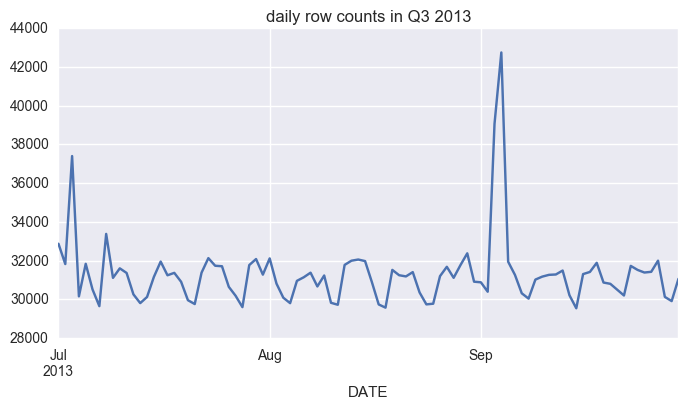

In [130]:
plt.figure(figsize=(8,4))
daily_rcnt[((daily_rcnt['Month']>='07') & (daily_rcnt['Month']<='09'))].set_index('DATE')['CNT'].plot()
plt.title('daily row counts in Q3 2013')

#### 2. Plot the daily total number of entries & exits across the system for Q3 2013.

In [ ]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select TURNSTILE,date,max(ENTRIES) AS entries, max(exits) as exits from pre 
    group by turnstile, date Having date LIKE '%13' AND substr(date,2,1) IN ('7','8','9') AND desc = 'REGULAR' """)
    turnstile_daily_Q3 = cur.fetchall()

In [ ]:
turnstile_daily_Q3_df = pd.DataFrame(turnstile_daily_Q3,columns = ['turnstile','date','entries','exits'])
turnstile_daily_Q3_df['date'] = pd.to_datetime(turnstile_daily_Q3_df['date'], format='%m-%d-%y')
turnstile_r_dfQ3 = pd.DataFrame(turnstile_daily_Q3_df.groupby(['turnstile','date']).sum().sum(axis = 1).groupby(level = 0).diff().dropna())#.values

turnstile_r_dfQ3 = turnstile_r_dfQ3.reset_index()
turnstile_r_dfQ3['station'] = list(map(lambda x:x.split('-')[0]+'-'+x.split('-')[1],turnstile_r_dfQ3['turnstile']))
turnstile_r_dfQ3  = turnstile_r_dfQ3[turnstile_r_dfQ3[0]>=0]

In [ ]:
turnstile_r_dfQ3[['date',0]].groupby('date').sum().sort_values(by = 0).head()

In [ ]:
turnstile_r_dfQ3[['date',0]].groupby('date').sum().sort_index().plot()
plt.title('daily total number of entries & exits across the system for Q3 2013')

#### 3.   Plot the mean and standard deviation of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA

In [ ]:
turnstile_r_dfQ3 

#### 4.   Plot 25/50/75 percentile of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA.

#### 5. Plot the daily number of closed stations and number of stations that were not operating at full capacity in Q3 2013